# GROUP 3 - BYTE ME!
Group evidence is found in the images folder under Prac6 - Group Evidence

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#1. Loading data and initial exploration

In [38]:
# Load the data
df = pd.read_csv('Mall_Customers.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
No

In [39]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [40]:
# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


 Data cleaning - no significant issues found

In [41]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Exploratory Data Analysis

Text(0.5, 1.0, 'Age Distribution')

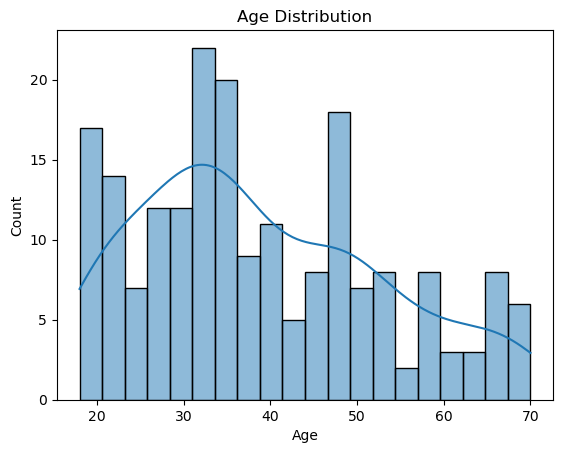

In [42]:
# First Insight
# Plot 1: Age distribution
sns.histplot(df['Age'], bins=20, kde=True)  #to draw the histogram
plt.title('Age Distribution')


Text(0.5, 1.0, 'Annual Income Distribution')

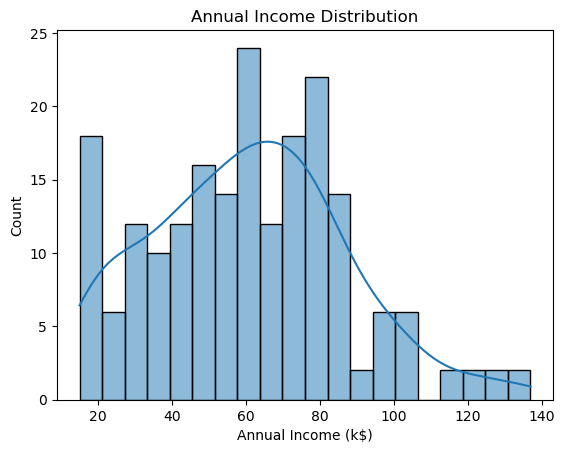

In [43]:
# Plot 2: Annual Income distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

Text(0.5, 1.0, 'Spending Score Distribution')

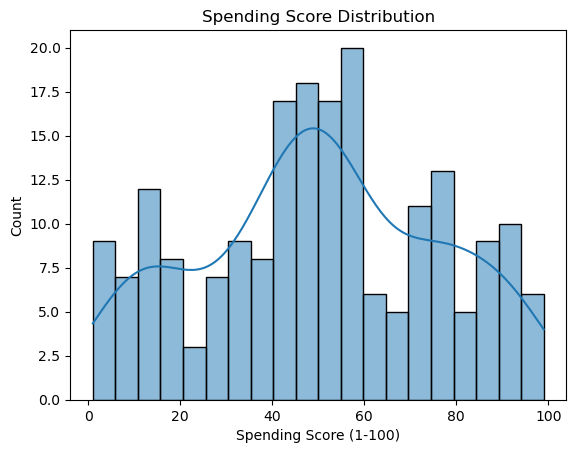

In [45]:
# Plot 3: Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

Text(0.5, 1.0, 'Gender Distribution')

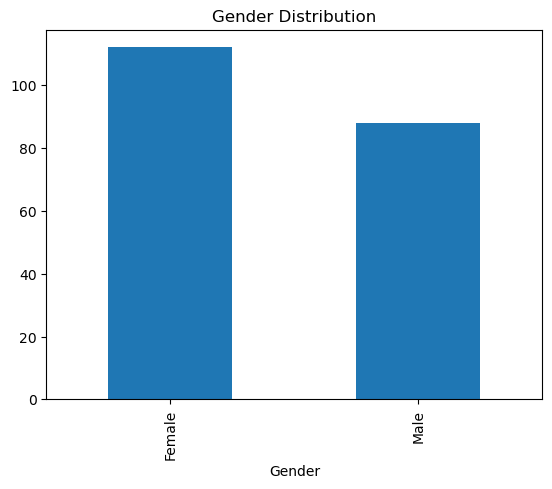

In [47]:
# Second Insight
# Gender distribution
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Income vs Spending Score')

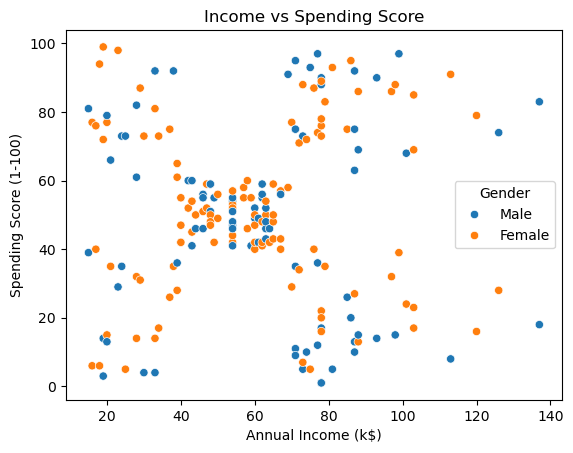

In [48]:
# Third Insight
# Plot 5: Income vs Spending Score by Gender
plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income vs Spending Score')


Text(0.5, 1.0, 'Age vs Spending Score')

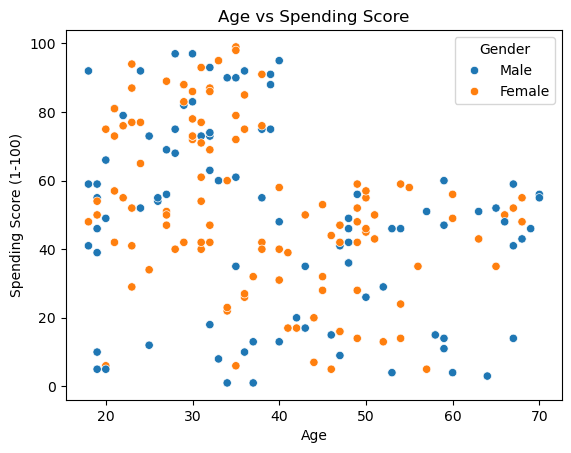

In [49]:
# Plot 6: Age vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score')

In [50]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# K- means Clustering

3a) Clustering with 1 feature

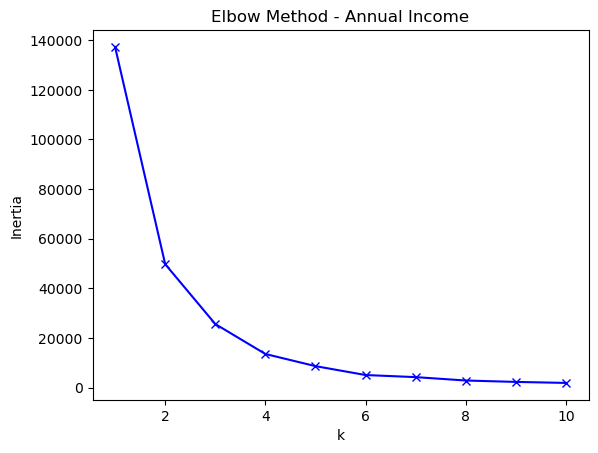

Silhouette Score (1 feature): 0.5188101430914764


In [55]:
X1 = df[['Annual Income (k$)']]


inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - Annual Income')
plt.show()


k_opt = 3
kmeans1 = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster_Income'] = kmeans1.fit_predict(X1)


score1 = silhouette_score(X1, df['Cluster_Income'])
print("Silhouette Score (1 feature):", score1)


3b) Clustering with 2 features

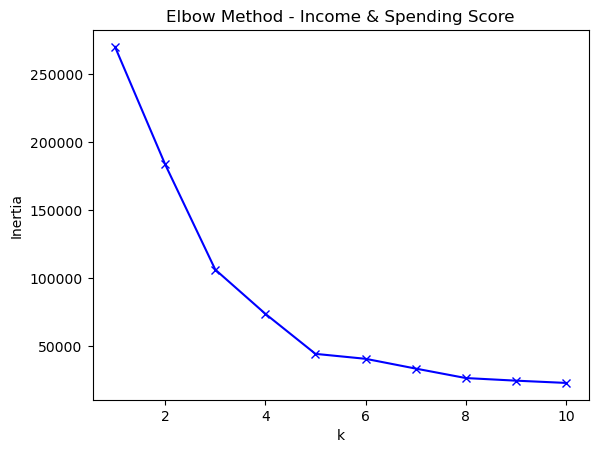

Silhouette Score (2 features): 0.553931997444648


In [56]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow Method
inertia2 = []
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X2)
    inertia2.append(model.inertia_)

plt.plot(K, inertia2, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method - Income & Spending Score')
plt.show()

# Optimal k (usually 5 for this dataset)
k_opt2 = 5
kmeans2 = KMeans(n_clusters=k_opt2, random_state=42)
df['Cluster_Income_Spend'] = kmeans2.fit_predict(X2)

# Silhouette Score
score2 = silhouette_score(X2, df['Cluster_Income_Spend'])
print("Silhouette Score (2 features):", score2)

# 4. Visualising and Commenting on the distribution of clusters

4a) Visualisation for one feature
Does not pay attention to who spends more or less
The income axis is partitioned into either low,mid or high

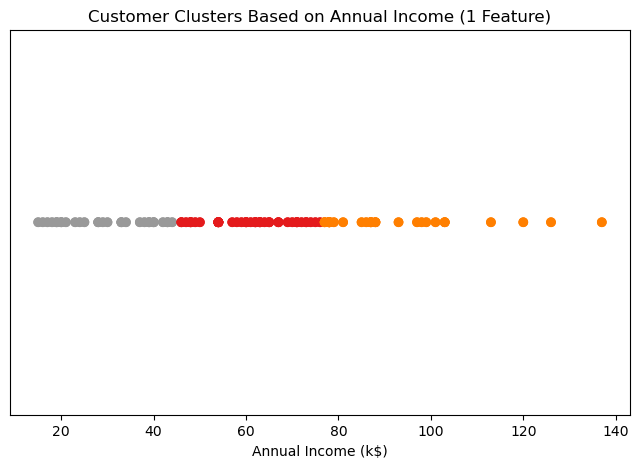

In [63]:


plt.figure(figsize=(8,5))
plt.scatter(df['Annual Income (k$)'], [0]*len(df), c=df['Cluster_Income'], cmap='Set1')
plt.xlabel('Annual Income (k$)')
plt.title('Customer Clusters Based on Annual Income (1 Feature)')
plt.yticks([])
plt.show()



4b) Visualisation for two features
Clusters capture people who fall in both spending and income
Visualization shows clusters separated spatially; cluster centers indicate typical Income & SpendingScore of each group.

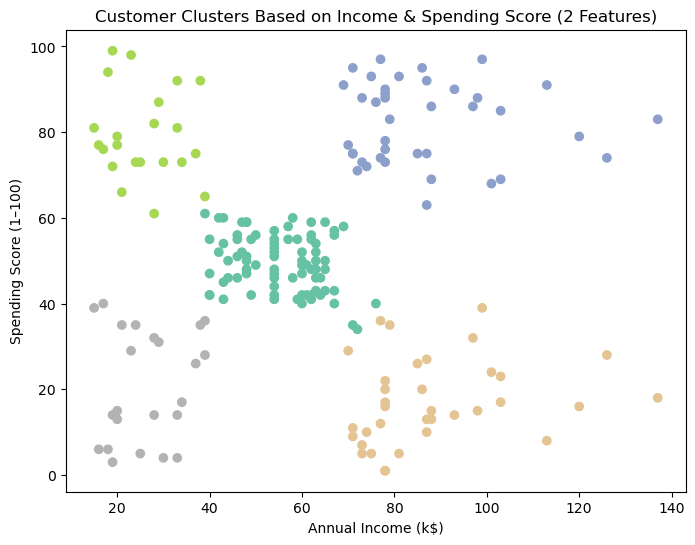

In [59]:


plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster_Income_Spend'], cmap='Set2')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Clusters Based on Income & Spending Score (2 Features)')
plt.show()


5. Using a case example of a mall segmenting customers for customer engagement, 
use the clustering done in 3b to suggest appropriate ways by which mall 
management can interact with their customers.

Using Annual Income and Spending Score This clustering is far more meaningful and realistic. Since both income and spending behaviour are considered, the clusters form visually separate bubble-like groups. We can clearly identify different customer types such as:

   - High income, high spending → luxury shoppers
   - Low income, high spending → impulse / trend-driven buyers
   - Low income, low spending → price sensitive shoppers
   - High income, low spending → conservative or savings-oriented customers

The results in 3b are more informative because they capture the capacity to spend and the spending behaviour. It shows which customers can be rewarded or those who can for example be converted into regular shoppers.

